# Fuzzy operations

Basic operations in fuzzy logic / sets are:
- AND: Conjunction / Intersection
- OR:  Disjunction / Union
- NOT: Negation / Complement

Let's explore some existing operators for these operations. 

In [1]:
import numpy as np
import matplotlib.pyplot as pl

%matplotlib inline

In [2]:
import membership_functions as mf

## Example fuzzy sets

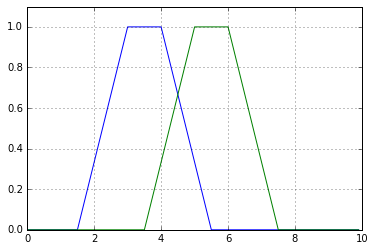

In [3]:
mfA = mf.TrapezoidalMF(3, 4, 1)
mfB = mf.TrapezoidalMF(5, 4, 1)

mfA.plot(0,10)
mfB.plot(0,10)
pl.grid()

In [4]:
input_values = np.arange(0, 10, 0.1)

In [5]:
membership_A = map(mfA, input_values)
membership_B = map(mfB, input_values)

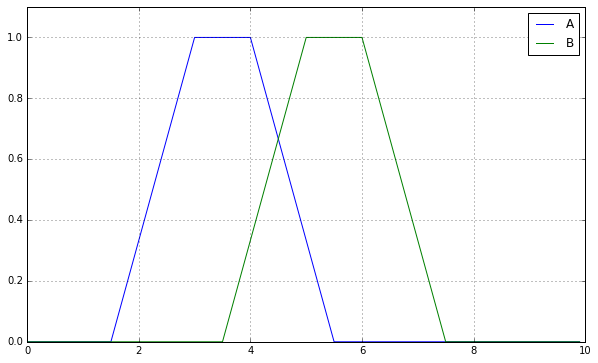

In [6]:
pl.figure(figsize=(10,6))
pl.plot(input_values, membership_A, label='A')
pl.plot(input_values, membership_B, label='B')
pl.ylim(0, 1.1)
pl.grid()
pl.legend()

## Fuzzy AND

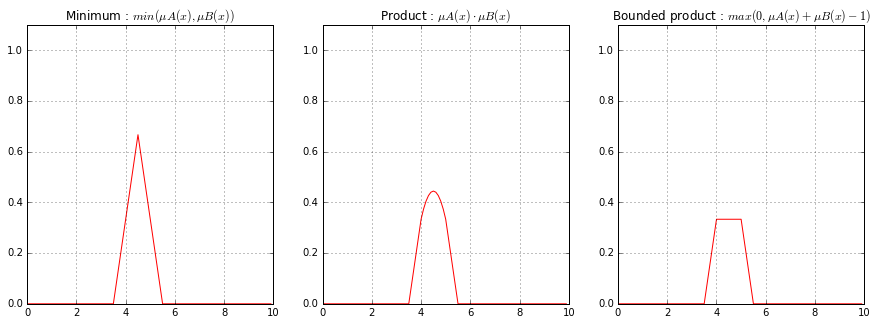

In [7]:
pl.figure(figsize=(15,5))
pl.subplot(1,3,1)
pl.plot(input_values, np.minimum(membership_A, membership_B), c='r')
pl.ylim(0, 1.1)
pl.grid()
pl.title('Minimum : $min(\mu A(x), \mu B(x))$')
pl.subplot(1,3,2)
pl.plot(input_values, np.multiply(membership_A, membership_B), c='r')
pl.ylim(0, 1.1)
pl.grid()
pl.title('Product : $\mu A(x) \cdot \mu B(x)$')
pl.subplot(1,3,3)
pl.plot(input_values, [max(0, membership_A[i] + membership_B[i] - 1) for i in np.arange(len(membership_A))], c='r')
pl.ylim(0, 1.1)
pl.grid()
pl.title('Bounded product : $max(0, \mu A(x) + \mu B(x) - 1)$')

## Fuzzy OR

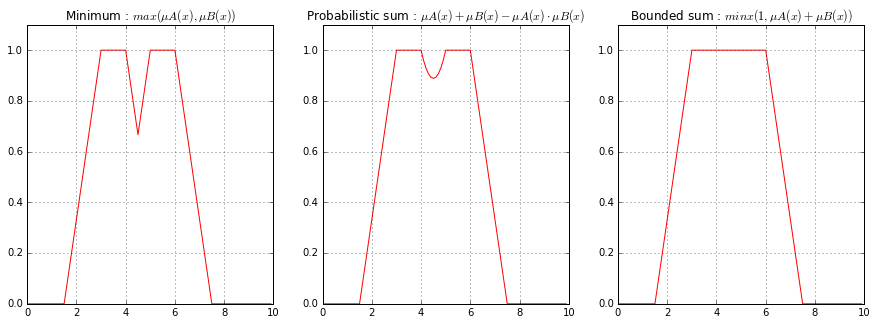

In [8]:
pl.figure(figsize=(15,5))
pl.subplot(1,3,1)
pl.plot(input_values, np.maximum(membership_A, membership_B), c='r')
pl.ylim(0, 1.1)
pl.grid()
pl.title('Minimum : $max(\mu A(x), \mu B(x))$')
pl.subplot(1,3,2)
pl.plot(input_values, np.add(membership_A, membership_B) - np.multiply(membership_A, membership_B), c='r')
pl.ylim(0, 1.1)
pl.grid()
pl.title('Probabilistic sum : $\mu A(x) + \mu B(x) - \mu A(x) \cdot \mu B(x)$')
pl.subplot(1,3,3)
pl.plot(input_values, [min(1, membership_A[i] + membership_B[i]) for i in np.arange(len(membership_A))], c='r')
pl.ylim(0, 1.1)
pl.grid()
pl.title('Bounded sum : $minx(1, \mu A(x) + \mu B(x))$')

## Fuzzy NOT

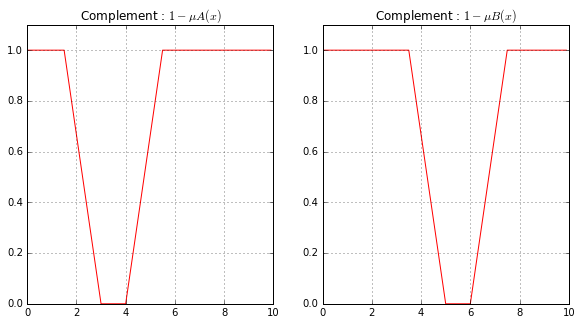

In [9]:
pl.figure(figsize=(15,5))
pl.subplot(1,3,1)
pl.plot(input_values, np.subtract(1, membership_A), c='r')
pl.ylim(0, 1.1)
pl.grid()
pl.title('Complement : $1 - \mu A(x)$')
pl.subplot(1,3,2)
pl.plot(input_values, np.subtract(1, membership_B), c='r')
pl.ylim(0, 1.1)
pl.grid()
pl.title('Complement : $1 - \mu B(x)$')

## Exercise

The examples above illustrate operations between membership functions that belong to the same variable. E.g., Temperature is Cold OR Warm. In many contexts, conditions are evaluated across several variables. E.g., Temperature is Cold OR Flow is Slow.
- Using the provided functions as starting point, implement the fuzzy operations for membership functions belonging to, at least, two (2) different variables.

In [91]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

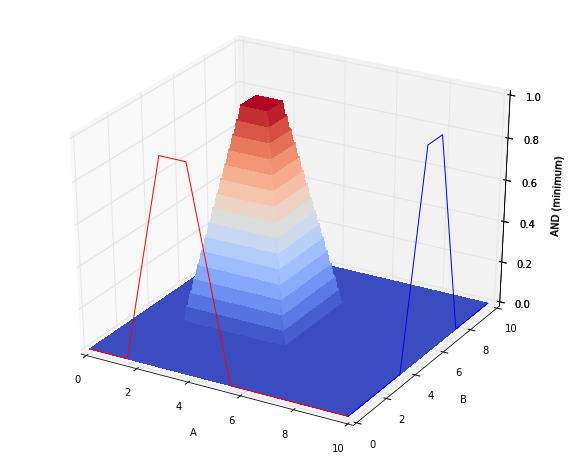

In [92]:
fig = pl.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')

n = len(input_values)
X, Y = np.meshgrid(input_values, input_values)
membership_A_2D = np.tile(membership_A, n).reshape(n,n)
membership_B_2D = np.tile(membership_B, n).reshape(n,n).T
Z = np.minimum(membership_A_2D, membership_B_2D)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('AND (minimum)')

ax.plot(input_values, np.zeros(n), membership_A, c='r')
ax.plot(max(input_values)*np.ones(n), input_values, membership_B, c='b')